# STAT 37710 - Machine Learning - Assignment 1

### Pierre-Yve Sojic

## Question 3 : Implement the k-means algorithm in a language of your choice, initializing the cluster centers randomly. The algorithm terminates when no further change in cluster assignments or centroids occurs.**

### (a)


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('toydata.txt', sep='\s+', header=None, names=['X', 'Y'])
print(df)

         X      Y
0    0.501 -0.247
1    0.831 -1.171
2    0.335  0.429
3    0.207 -0.488
4   -0.778 -0.106
..     ...    ...
495  4.435 -2.214
496  4.058 -2.080
497  5.450 -3.735
498  5.051 -3.046
499  4.443 -3.105

[500 rows x 2 columns]


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/vm/mgglb02j0ks_1fvmd84gyw4c0000gn/T/ipykernel_66427/356249796.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('toydata.txt', sep='\s+', header=None, names=['X', 'Y'])


In [21]:
def compute_distortion(X, centroids, labels):
    distortion = 0
    for i, centroid in enumerate(centroids):
        distortion += np.sum((X[labels == i] - centroid)**2)
    return distortion

def kmeans_random(X, k, max_iter=100):
    n = X.shape[0]
    # Pick k random indices for initial centroids
    indices = np.random.choice(n, k, replace=False)
    centroids = X[indices]

    distortions = []
    for _ in range(max_iter):
        # Compute distance from every point to each centroid
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        # Assign each point to the nearest centroid
        labels = np.argmin(distances, axis=1)

        # Update centroids as the mean of assigned points
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels==j) else centroids[j]
                                  for j in range(k)])
        # Compute and record distortion
        distortion = compute_distortion(X, new_centroids, labels)
        distortions.append(distortion)
        
        # Terminate if centroids do not change significantly
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels, distortions

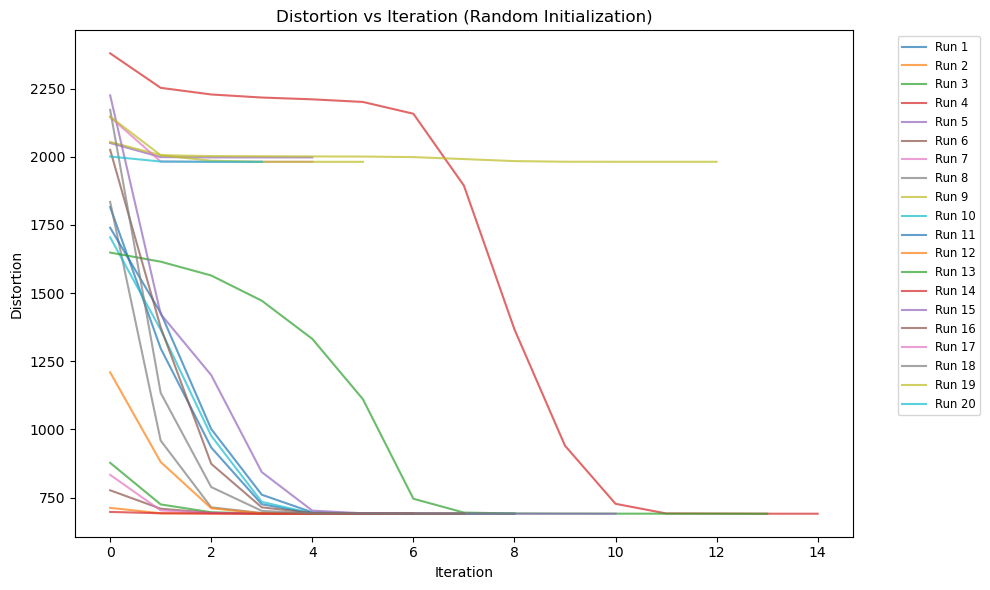

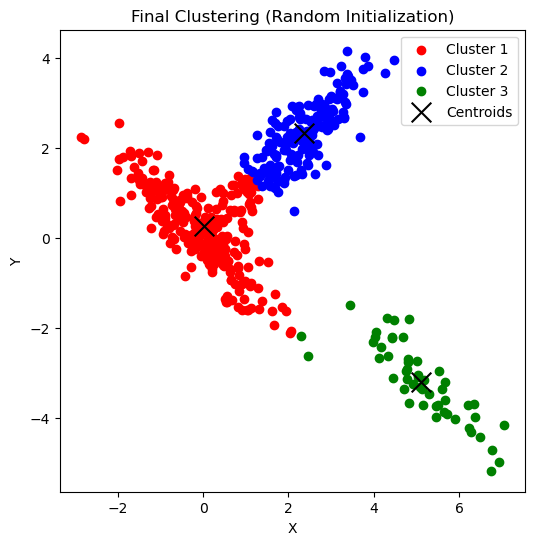

In [40]:
X = df.values 
k = 3

# Run k-means with random initialization 20 times and plot distortion vs. iteration
plt.figure(figsize=(10,6))
for run in range(20):
    centroids, labels, distortions = kmeans_random(X, k)
    plt.plot(distortions, label=f'Run {run+1}', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs Iteration (Random Initialization)')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the final clustering assignment (using one run from random initialization)
centroids, labels, distortions_random = kmeans_random(X, k)
plt.figure(figsize=(6,6))
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black', label='Centroids')
plt.title('Final Clustering (Random Initialization)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

We can see in the first graph that some runs end up with a final distortion much higher than other runs (see Run 9 for example), meaning that they got stuck in a poor local minimum. Hence, not all runs end up with a "correct" cluster, which is why it is highly recommended to re-run the k-means algorithm multiple times with different starting centroids to increase the probability of finding the global minimum for the distortion. 

We can also observe that some runs converge much faster to their extremum than others (e.g. Run 12 vs Run 4), which is due to better starting centroids. In general with this dataset, the vast majority of the runs end up finding the correct clusters (the ones that minimize distortion).

### (b)

In [ ]:
def kmeans_pp(X, k, max_iter=100):
    """Run k-means using k-means++ initialization."""
    n = X.shape[0]
    centroids = []
    # Choose the first centroid randomly
    first_index = np.random.choice(n)
    centroids.append(X[first_index])
    
    # For each subsequent centroid, choose with probability proportional to squared distance
    for _ in range(1, k):
        dists = np.array([min(np.linalg.norm(x - centroid)**2 for centroid in centroids) for x in X])
        probabilities = dists / dists.sum()
        next_index = np.random.choice(n, p=probabilities)
        centroids.append(X[next_index])
    centroids = np.array(centroids)
    
    distortions = []
    for _ in range(max_iter):
        distances = np.linalg.norm(X[:, np.newaxis, :] - centroids[np.newaxis, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.any(labels==j) else centroids[j]
                                  for j in range(k)])
        distortion = compute_distortion(X, new_centroids, labels)
        distortions.append(distortion)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
        
    return centroids, labels, distortions

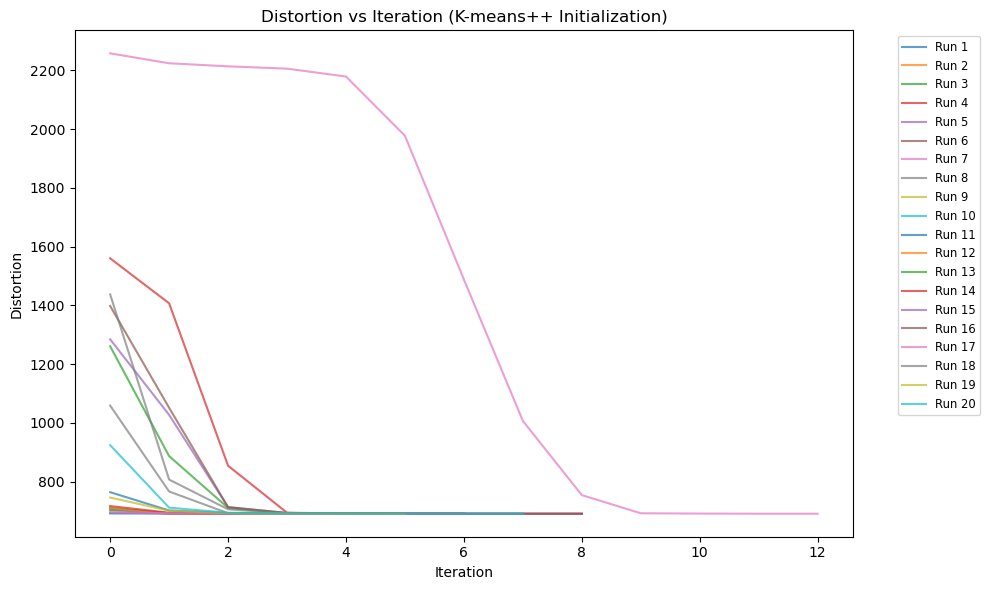

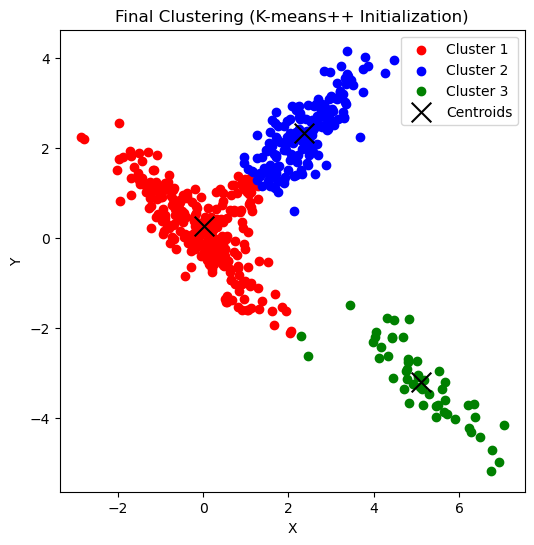

In [57]:
plt.figure(figsize=(10,6))
for run in range(20):
    centroids, labels, distortions = kmeans_pp(X, k)
    plt.plot(distortions, label=f'Run {run+1}', alpha=0.7)
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title('Distortion vs Iteration (K-means++ Initialization)')
plt.legend(fontsize='small', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot the final clustering assignment (using one run from k-means++ initialization).
centroids, labels, distortions_pp = kmeans_pp(X, k)
plt.figure(figsize=(6,6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, color='black', label='Centroids')
plt.title('Final Clustering (K-means++ Initialization)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

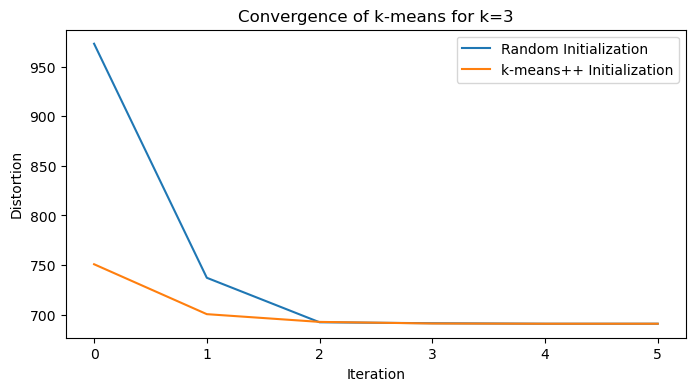

In [38]:
results = {}

# Run with random initialization
centroids_random, labels_random, distortions_random = kmeans_random(X, k, max_iter=100)

# Run with k-means++ initialization
centroids_pp, labels_pp, distortions_pp = kmeans_pp(X, k, max_iter=100)

results[k] = {
    'random': {'centroids': centroids_random, 'labels': labels_random, 'distortions': distortions_random},
    'kmeans++': {'centroids': centroids_pp, 'labels': labels_pp, 'distortions': distortions_pp},
}

plt.figure(figsize=(8, 4))
plt.plot(distortions_random, label='Random Initialization')
plt.plot(distortions_pp, label='k-means++ Initialization')
plt.xlabel('Iteration')
plt.ylabel('Distortion')
plt.title(f'Convergence of k-means for k={k}')
plt.legend()
plt.show()

Both the random k-means algorithm and the k-means++ arrive at the same final distortion and clusters. We can also observe by comparing the "Distortion vs Iteration" graphs of both methods that the k-means++ algorithm converges, on average, faster to the optimal final clusters. It also seems from the above graphs that the k-means++ algorithm has a much lower proportion of runs that end up in a poor local minimum (in this case, all the runs actually end up with the optimal clusters), which could most likely be due to the better choice of initial starting centroids which are guaranteed to be far appart (thus also leading to faster convergence), as opposed to the original k-means algorithm where the choice of each starting starting centroids is fully random (and we could thus have a situation where two centroids are extremely close to each other).

### (c)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

mnist_trainset = datasets.MNIST(root='./data', train=True,
download=True, transform=transforms.ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=False,
download=True, transform=transforms.ToTensor())

In [13]:
# flatten the images and convert them to numpy arrays
X = np.array([img.numpy().flatten() for img, _ in mnist_trainset])
print("Data shape:", X.shape)

Data shape: (60000, 784)


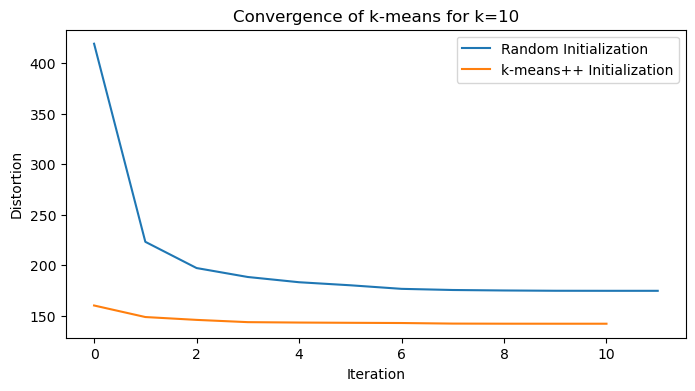

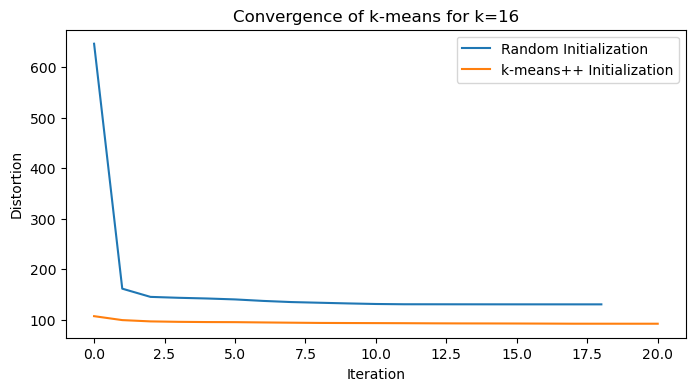

In [58]:
# Choose k values
ks = [10, 16]

results = {}

for k in ks:
    # Run with random initialization
    centroids_random, labels_random, distortions_random = kmeans_random(X, k, max_iter=100)
    
    # Run with k-means++ initialization
    centroids_pp, labels_pp, distortions_pp = kmeans_pp(X, k, max_iter=100)
    
    results[k] = {
        'random': {'centroids': centroids_random, 'labels': labels_random, 'distortions': distortions_random},
        'kmeans++': {'centroids': centroids_pp, 'labels': labels_pp, 'distortions': distortions_pp},
    }
    
    plt.figure(figsize=(8, 4))
    plt.plot(distortions_random, label='Random Initialization')
    plt.plot(distortions_pp, label='k-means++ Initialization')
    plt.xlabel('Iteration')
    plt.ylabel('Distortion')
    plt.title(f'Convergence of k-means for k={k}')
    plt.legend()
    plt.show()


We can see that the k-means++ algorithm converges much faster to the final distortion in both cases. It does not only converge faster, but the k-means++ algorithm also finds a better final set of clusters (with lower distortion), both with the k = 10 and k = 16 cases. We can also observe that the distortion with k = 16 is slightly lower than the distortion with k = 10, which might indicate (at least for this specific run) that a higher number of clusters provides better results for this specific dataset.

***

## Question 4

### (g)

In [62]:
from scipy.stats import multivariate_normal

def em_gmm(X, k, max_iter=100, tol=1e-4):
    n, d = X.shape
    indices = np.random.choice(n, k, replace=False)
    means = X[indices].copy()
    
    # Initialize each covariance to the overall data covariance
    covariances = np.array([np.cov(X.T) for _ in range(k)])
    
    # Initialize mixing weights uniformly
    pis = np.ones(k) / k
    
    log_likelihoods = []
    
    for iteration in range(max_iter):
        responsibilities = np.zeros((n, k))
        for j in range(k):
            rv = multivariate_normal(mean=means[j], cov=covariances[j], allow_singular=True)
            responsibilities[:, j] = pis[j] * rv.pdf(X)
        responsibilities /= responsibilities.sum(axis=1, keepdims=True)
        
        # Compute the log-likelihood for the current parameters.
        ll = np.sum(np.log(responsibilities.sum(axis=1)))
        log_likelihoods.append(ll)
        
        N_k = responsibilities.sum(axis=0)  # Shape: (k,)
        # Update mixture weights
        pis = N_k / n
        # Update means
        means = np.dot(responsibilities.T, X) / N_k[:, None]
        # Update covariance matrices
        for j in range(k):
            diff = X - means[j]
            covariances[j] = np.dot((responsibilities[:, j][:, None] * diff).T, diff) / N_k[j]
            
        # Check for convergence using a simple log-likelihood improvement
        if iteration > 0 and np.abs(log_likelihoods[-1] - log_likelihoods[-2]) < tol:
            break

    return means, covariances, pis, responsibilities, log_likelihoods

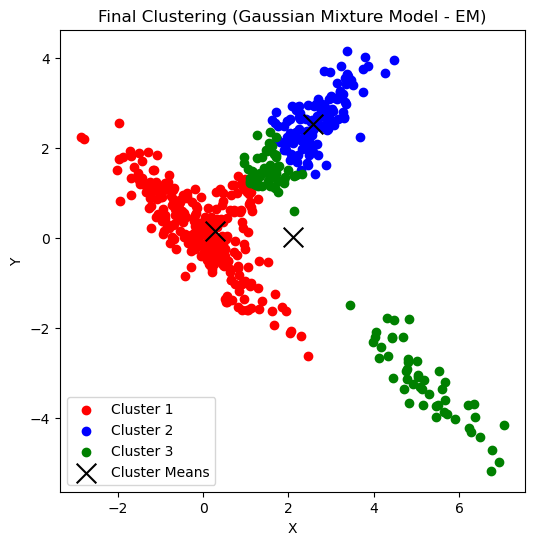

In [66]:
means, covariances, pis, responsibilities, log_likelihoods = em_gmm(X, k, max_iter=100)
# For clustering visualization, assign each point to the component with highest responsibility.
labels_em = np.argmax(responsibilities, axis=1)

plt.figure(figsize=(6, 6))
colors = ['red', 'blue', 'green']
for i in range(k):
    plt.scatter(X[labels_em == i, 0], X[labels_em == i, 1], color=colors[i], label=f'Cluster {i+1}')
# Mark the cluster means
plt.scatter(means[:, 0], means[:, 1], marker='x', s=200, color='black', label='Cluster Means')
plt.title('Final Clustering (Gaussian Mixture Model - EM)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

***

## Question 5

In [103]:
np.random.seed(123)

# Cluster A: Very large cluster around (0,0)
n_A = 10000
mean_A = np.array([0, 0])
sigma_A = 3.0 
cluster_A = np.random.randn(n_A, 2) * sigma_A + mean_A

# Cluster B: Just 1 single point (or a few) far away at (2000,2000)
# This is so extreme that random init will almost never pick it.
n_B = 1
cluster_B = np.array([[2000.0, 2000.0]])

X = np.vstack((cluster_A, cluster_B))
np.random.shuffle(X)

print("Dataset shape:", X.shape)

def compute_distortion(X, centroids, labels):
    return np.sum((X - centroids[labels])**2)

def kmeans_with_init(X, initial_centroids, max_iter=100):
    centroids = initial_centroids.copy()
    for _ in range(max_iter):
        dists = np.linalg.norm(X[:, None] - centroids[None, :], axis=2)
        labels = np.argmin(dists, axis=1)
        
        new_centroids = []
        for j in range(len(centroids)):
            if np.any(labels == j):
                new_centroids.append(X[labels == j].mean(axis=0))
            else:
                new_centroids.append(centroids[j])
        new_centroids = np.array(new_centroids)
        
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids

    final_distortion = compute_distortion(X, centroids, labels)
    return centroids, labels, final_distortion

def kmeans_random(X, k, max_iter=100):
    n = X.shape[0]
    indices = np.random.choice(n, k, replace=False)
    init_centroids = X[indices]
    return kmeans_with_init(X, init_centroids, max_iter)

def initialize_kmeans_plus_plus(X, k):
    n, d = X.shape
    centroids = np.empty((k, d))
    idx = np.random.choice(n)
    centroids[0] = X[idx]

    for i in range(1, k):
        dists_sq = np.min(np.linalg.norm(X[:, None] - centroids[:i], axis=2)**2, axis=1)
        probs = dists_sq / np.sum(dists_sq)
        next_idx = np.random.choice(n, p=probs)
        centroids[i] = X[next_idx]
    return centroids

def kmeans_plus_plus(X, k, max_iter=100):
    init_centroids = initialize_kmeans_plus_plus(X, k)
    return kmeans_with_init(X, init_centroids, max_iter)

k = 2
n_runs = 100

random_distortions = []
plusplus_distortions = []

for run in range(n_runs):
    _, _, dist_rand = kmeans_random(X, k)
    _, _, dist_pp = kmeans_plus_plus(X, k)
    random_distortions.append(dist_rand)
    plusplus_distortions.append(dist_pp)

avg_rand = np.mean(random_distortions)
avg_plus = np.mean(plusplus_distortions)
ratio = avg_rand / avg_plus

print("Average Distortion (Random Init):", avg_rand)
print("Average Distortion (k-means++):", avg_plus)
print("Ratio (Random / k-means++):", ratio)


Dataset shape: (10001, 2)
Average Distortion (Random Init): 7944560.808650987
Average Distortion (k-means++): 655483.6846027954
Ratio (Random / k-means++): 12.120150348921602
